In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [10]:
claims=pd.read_csv('Dataset/claims.csv')
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [13]:
cust_demographics=pd.read_csv('Dataset/cust_demographics.csv')
cust_demographics.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [14]:
customer_claims = claims.merge(cust_demographics,left_on="customer_id",right_on="CUST_ID")
customer_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [15]:
customer_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [16]:
customer_claims.claim_amount=customer_claims.claim_amount.str.replace('$','').astype('float')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21344\2829531046.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customer_claims.claim_amount=customer_claims.claim_amount.str.replace('$','').astype('float')


In [17]:
customer_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [18]:
customer_claims.drop(columns=["CUST_ID"],inplace=True)

In [19]:
customer_claims["claim_date"]=customer_claims["claim_date"].apply(lambda x:pd.to_datetime(x))

In [20]:
customer_claims["claim_date"]=customer_claims["claim_date"].apply(lambda x:pd.to_datetime(x))

In [ ]:
customer_claims["claim_amount"]=customer_claims["claim_amount"].str.replace("$"," ")

In [21]:
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [22]:
customer_claims["claim_amount"]=customer_claims["claim_amount"].astype("float")

In [23]:
customer_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [ ]:
customer_claims["police_report_flag"]=np.where(customer_claims["police_report"]=="Yes",1,0)

In [118]:
customer_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,10,2018
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018


In [25]:
customer_claims.groupby(["claim_type","claim_id","customer_id"])[["customer_id"]].head(10)

,customer_id
0,21868593
1,75740424
2,30308357
3,30308357
4,47830476
...,...
1080,79539873
1081,42364152
1082,19888166
1083,11256802


In [26]:
customer_claims.drop_duplicates(subset="customer_id",keep='last')

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [27]:
customer_claims.duplicated().sum()

0

In [28]:
customer_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [29]:
customer_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [127]:

curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(customer_claims['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
customer_claims['age'] = (np.where(dob_year > curr_year,v,y))
#Categorising
customer_claims.loc[(customer_claims.age < 18),'AgeGroup'] = 'Children'
customer_claims.loc[(customer_claims.age >=18) & (customer_claims.age <30),'AgeGroup'] = 'Youth'
customer_claims.loc[(customer_claims.age >=30) & (customer_claims.age <60),'AgeGroup'] = 'Adult'
customer_claims.loc[(customer_claims.age >=60),'AgeGroup'] = 'Senior'


In [132]:

customer_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,10,2018,53,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018,37,Adult


In [136]:
customer_claims.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     809
Senior    102
Youth     174
Name: age, dtype: int64

In [137]:
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,10,2018,53,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,9,2018,42,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,5,2017,27,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,5,2017,33,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,4,2017,59,Adult


In [138]:
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,10,2018,53,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,9,2018,42,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,5,2017,27,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,5,2017,33,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,4,2017,59,Adult


In [139]:
customer_claims["total_policy_claims"].value_counts()

1.0    795
2.0    105
3.0     86
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [140]:
customer_claims.claim_amount.mean()

12467.68137254902

In [141]:
customer_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1085 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [142]:
customer_claims["claim_amount"]=customer_claims.claim_amount.fillna(customer_claims.claim_amount.mean())

In [143]:
customer_claims.total_policy_claims.mode()

0    1.0
Name: total_policy_claims, dtype: float64

In [144]:
customer_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1085 non-null   float64       
 8   total_policy_claims  1085 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [145]:
customer_claims["total_policy_claims"]=customer_claims.total_policy_claims.fillna(1.0)

In [146]:
customer_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1085 non-null   float64       
 8   total_policy_claims  1085 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [147]:
customer_claims.groupby("Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12829.631974
Platinum,12341.952267
Silver,12208.435570


In [148]:
from datetime import date,timedelta ,datetime
dt = datetime.strptime("2018-10-01", '%Y-%m-%d')
days_before = (dt -timedelta(days=20)).isoformat()
days_before
data=customer_claims[customer_claims["claim_date"]<days_before]
data
data["claim_amount"].sum()

12402276.019607846

In [149]:
days_before

'2018-09-11T00:00:00'

In [150]:
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017,44,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018,37,Adult
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,4,2017,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,9,2018,42,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,5,2017,27,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,5,2017,33,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,4,2017,59,Adult


In [151]:
data["claim_amount"].sum()

12402276.019607846

In [152]:
customer_claims[((customer_claims["State"]=="TX") |
                 (customer_claims["State"]=="DE") |
                 (customer_claims["State"]=="AK")) &
                ((customer_claims["incident_cause"]=="Driver error") | 
                 (customer_claims["incident_cause"]=="Other driver error"))].count()

claim_id               36
customer_id            36
incident_cause         36
claim_date             36
claim_area             36
police_report          36
claim_type             36
claim_amount           36
total_policy_claims    36
fraudulent             36
gender                 36
DateOfBirth            36
State                  36
Contact                36
Segment                36
claims_month_wise      36
claim_date_year        36
age                    36
AgeGroup               36
dtype: int64

In [153]:
claim_amount=pd.pivot_table(data=customer_claims,index="Segment",columns=['gender'],values='claim_amount',aggfunc='sum')

In [154]:
claim_amount

gender,Female,Male
Segment,,
Gold,2.109738e+06,2.701374e+06
Platinum,2.369484e+06,2.098303e+06
Silver,1.901912e+06,2.346624e+06


<IPython.core.display.Javascript object>


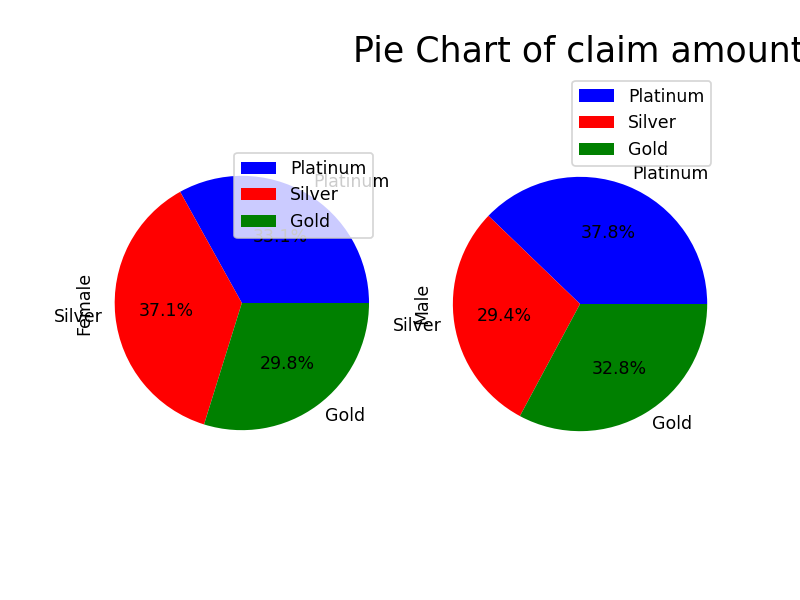

In [155]:
claim_amount.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['b', 'r', 'g'],
            autopct='%.1f%%', 
            fontsize=10,
            subplots='true')

plt.title('Pie Chart of claim amount',fontsize=20)
plt.axis('equal')
plt.show()

In [156]:
driver_claim_female=customer_claims[(customer_claims["gender"]=="Female") 
                 &
                ((customer_claims["incident_cause"]=="Driver error") | 
                 (customer_claims["incident_cause"]=="Other driver error"))].count()
driver_claim_female

claim_id               222
customer_id            222
incident_cause         222
claim_date             222
claim_area             222
police_report          222
claim_type             222
claim_amount           222
total_policy_claims    222
fraudulent             222
gender                 222
DateOfBirth            222
State                  222
Contact                222
Segment                222
claims_month_wise      222
claim_date_year        222
age                    222
AgeGroup               222
dtype: int64

In [157]:
driver_claim_male=customer_claims[(customer_claims["gender"]=="Male") 
                 &
                ((customer_claims["incident_cause"]=="Driver error") | 
                 (customer_claims["incident_cause"]=="Other driver error"))].count()
driver_claim_male

claim_id               284
customer_id            284
incident_cause         284
claim_date             284
claim_area             284
police_report          284
claim_type             284
claim_amount           284
total_policy_claims    284
fraudulent             284
gender                 284
DateOfBirth            284
State                  284
Contact                284
Segment                284
claims_month_wise      284
claim_date_year        284
age                    284
AgeGroup               284
dtype: int64

In [158]:
customer_claims["claims_month_wise"]=customer_claims["claim_date"].apply(lambda x:x.month)

In [159]:
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,10,2018,53,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,9,2018,42,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,5,2017,27,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,5,2017,33,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,4,2017,59,Adult


In [160]:
monthly_trend=pd.pivot_table(data=customer_claims,index="claims_month_wise",values='claim_amount',aggfunc='sum')
monthly_trend

,claim_amount
claims_month_wise,
1,1.331992e+06
2,1.169906e+06
3,1.320080e+06
4,1.293886e+06
5,1.114189e+06
6,1.278826e+06
7,1.379010e+06
8,9.111950e+05
9,9.828598e+05


<IPython.core.display.Javascript object>


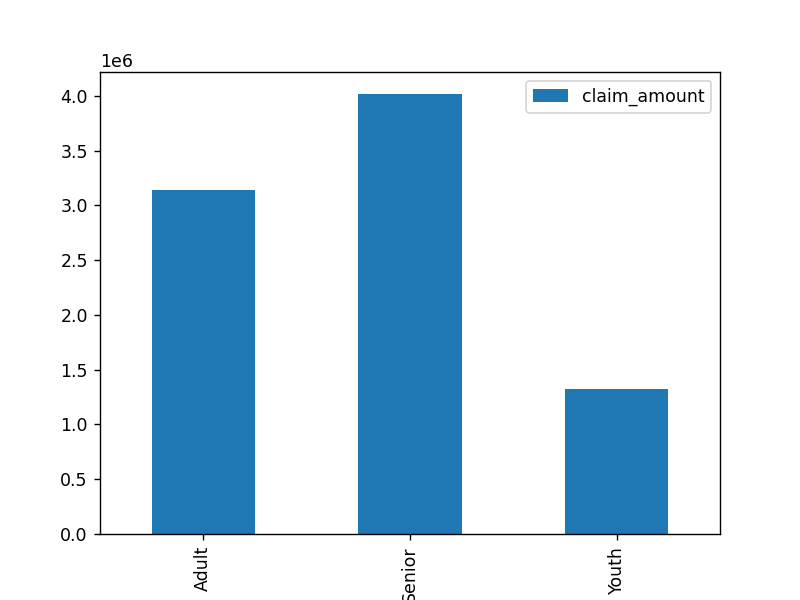

<AxesSubplot:xlabel='claims_month_wise'>

In [161]:
monthly_trend.plot(kind="bar")

In [162]:
driver_related_issue = customer_claims.loc[customer_claims['incident_cause'].isin(['Driver error','Other driver error'])]
gender_amount = driver_related_issue.groupby(['gender'])['claim_amount'].sum()

In [163]:
gender_amount

gender
Female    3.139645e+06
Male      4.017650e+06
Name: claim_amount, dtype: float64

In [164]:
gender_amount.plot(kind = 'bar')

<AxesSubplot:xlabel='gender'>

In [167]:
claim_amount_category_based=pd.pivot_table(data=customer_claims,index="AgeGroup",columns=['gender'],values='claim_amount',aggfunc='sum')

In [168]:
claim_amount_category_based

gender,Female,Male
AgeGroup,,
Adult,4.827800e+06,5.374067e+06
Senior,4.970151e+05,6.425534e+05
Youth,1.056318e+06,1.129680e+06


In [169]:
max_fraudulent_age_issue=customer_claims.loc[customer_claims["fraudulent"]=="Yes"]

In [170]:
max_fraudulent_age=max_fraudulent_age_issue.groupby(["AgeGroup"])["total_policy_claims"].sum()

In [171]:
max_fraudulent_age

AgeGroup
Adult     318.0
Senior     50.0
Youth      61.0
Name: total_policy_claims, dtype: float64

In [183]:
max_fraudulent_age.plot(kind="bar")
plt.show()

In [184]:
claim_amount_gender_age=pd.pivot_table(data=customer_claims,index=["AgeGroup","gender"],columns=['fraudulent'],
                                       values='claim_amount',aggfunc='mean')

In [185]:
claim_amount_gender_age

fraudulent                 No           Yes
AgeGroup gender                            
Adult    Female  12091.280840  12647.671516
         Male    12180.288040  15597.067920
Senior   Female  13344.426916   3332.294118
         Male    10869.427041  19463.111111
Youth    Female  13148.133002  10140.335172
         Male    13275.281176   8935.612092

<IPython.core.display.Javascript object>


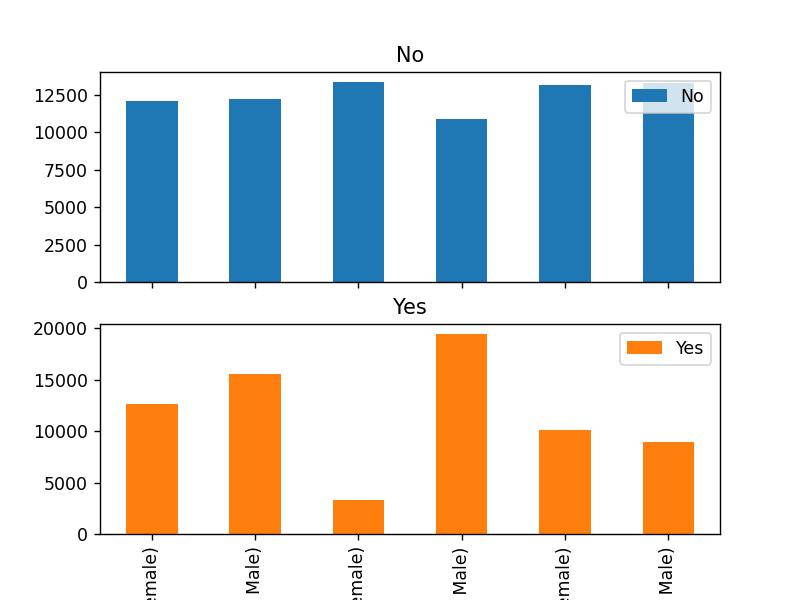

array([<AxesSubplot:title={'center':'No'}, xlabel='AgeGroup,gender'>,
       <AxesSubplot:title={'center':'Yes'}, xlabel='AgeGroup,gender'>],
      dtype=object)

In [186]:
claim_amount_gender_age.plot(kind="bar",subplots=True)

In [187]:
claims_male = customer_claims["claim_amount"].loc[customer_claims["gender"]=="Male"]
claims_female = customer_claims["claim_amount"].loc[customer_claims["gender"]=="Female"]

In [188]:
claims_male.mean()

12853.058506136278

In [189]:
claims_female.mean()

12062.634706623674

In [192]:
import scipy.stats as stats

equal_variance = stats.ttest_ind(a= claims_male,
                b= claims_female,
                equal_var=True)    
equal_variance.statistic

0.9738138415066818

In [193]:
unequal_variance = stats.ttest_ind(a= claims_male,
                b= claims_female,
                equal_var=False)    
unequal_variance.statistic

0.9746136200857317

In [194]:
unequal_variance.statistic - equal_variance.statistic

0.0007997785790498924

In [195]:
p_value = equal_variance.pvalue
p_value

0.33036643165116597

In [196]:
if (p_value<0.05):
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis/there is some relationship between the two")

We fail to reject null hypothesis/there is some relationship between the two


In [198]:
age_segment_relation=pd.crosstab(customer_claims["AgeGroup"],customer_claims["Segment"],margins=True)

In [199]:
age_segment_relation

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,281,269,259,809
Senior,38,34,30,102
Youth,56,59,59,174
All,375,362,348,1085


In [200]:
chi_test=stats.chi2_contingency(observed= age_segment_relation)
chi_test

(0.9329931615944429,
 0.9995770289043182,
 9,
 array([[ 279.60829493,  269.91520737,  259.4764977 ,  809.        ],
        [  35.25345622,   34.03133641,   32.71520737,  102.        ],
        [  60.13824885,   58.05345622,   55.80829493,  174.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

In [201]:
chi_test_stats=chi_test[0]
chi_test_stats

0.9329931615944429

In [202]:
p_test=chi_test[1]
p_test

0.9995770289043182

In [203]:
customer_claims.total_policy_claims.corr(other=customer_claims.claim_amount)

-0.017952953318903033

<IPython.core.display.Javascript object>


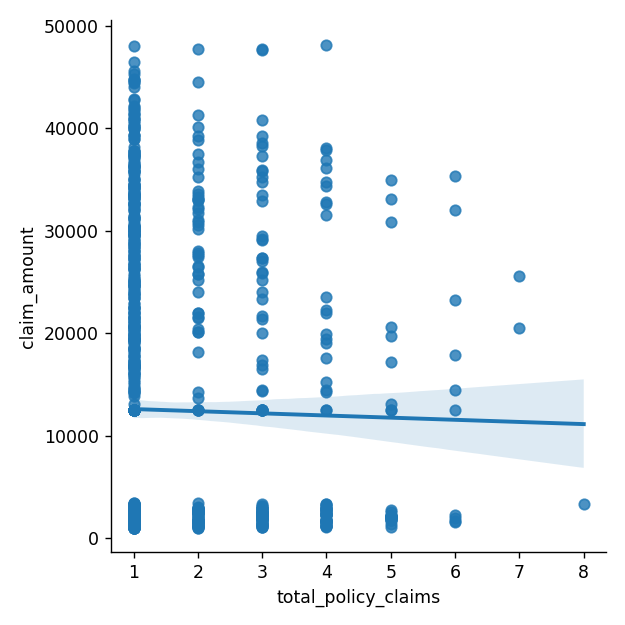

In [204]:
import seaborn as sns
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = customer_claims)

In [219]:
customer_claims["Age_Group_cat"]=np.where((customer_claims.age.astype(int)<18),1,np.where(((customer_claims.age.astype(int)>18) & (customer_claims.age.astype(int)<30)),2,
                                     np.where(((customer_claims.age.astype(int)>=30) & (customer_claims.age.astype(int)<60)),3,4)))

In [220]:
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year,age,AgeGroup,Age_Group_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017,44,Adult,3
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,10,2018,53,Adult,3
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018,39,Adult,3
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018,39,Adult,3
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018,37,Adult,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,9,2018,42,Adult,3
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,5,2017,27,Youth,2
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,5,2017,33,Adult,3
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,4,2017,59,Adult,3


In [221]:
customer_claims["total_policy_claims"].value_counts()

1.0    795
2.0    105
3.0     86
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [223]:
ct=pd.crosstab(customer_claims.total_policy_claims,customer_claims.Age_Group_cat,margins=True)
ct

Age_Group_cat,2,3,4,All
total_policy_claims,,,,
1.0,127,590,78,795
2.0,15,82,8,105
3.0,12,68,6,86
4.0,10,43,6,59
5.0,7,16,4,27
6.0,1,9,0,10
7.0,1,1,0,2
8.0,1,0,0,1
All,174,809,102,1085


In [224]:
stats.chi2_contingency(ct)

(13.830502920728946,
 0.95038635283539,
 24,
 array([[1.27493088e+02, 5.92769585e+02, 7.47373272e+01, 7.95000000e+02],
        [1.68387097e+01, 7.82903226e+01, 9.87096774e+00, 1.05000000e+02],
        [1.37917051e+01, 6.41235023e+01, 8.08479263e+00, 8.60000000e+01],
        [9.46175115e+00, 4.39917051e+01, 5.54654378e+00, 5.90000000e+01],
        [4.32995392e+00, 2.01317972e+01, 2.53824885e+00, 2.70000000e+01],
        [1.60368664e+00, 7.45622120e+00, 9.40092166e-01, 1.00000000e+01],
        [3.20737327e-01, 1.49124424e+00, 1.88018433e-01, 2.00000000e+00],
        [1.60368664e-01, 7.45622120e-01, 9.40092166e-02, 1.00000000e+00],
        [1.74000000e+02, 8.09000000e+02, 1.02000000e+02, 1.08500000e+03]]))

In [225]:
customer_claims["claim_date_year"]=customer_claims["claim_date"].dt.year
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claims_month_wise,claim_date_year,age,AgeGroup,Age_Group_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,11,2017,44,Adult,3
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,10,2018,53,Adult,3
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,2,2018,39,Adult,3
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,4,2018,39,Adult,3
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,6,2018,37,Adult,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,9,2018,42,Adult,3
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,5,2017,27,Youth,2
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,5,2017,33,Adult,3
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,4,2017,59,Adult,3


In [226]:
customer_claims["claim_date_year"].value_counts()

2017    598
2018    487
Name: claim_date_year, dtype: int64

In [227]:
customer_claims[["claim_date_year","claim_amount"]].groupby("claim_date_year").mean()

,claim_amount
claim_date_year,
2017,12277.550372
2018,12701.148186


In [228]:
year_2017=customer_claims.claim_amount[customer_claims.claim_date_year==2017]
year_2018=customer_claims.claim_amount[customer_claims.claim_date_year==2018]

In [229]:
stats.f_oneway(year_2017,year_2018)

F_onewayResult(statistic=0.26950505500001226, pvalue=0.603770046828783)

In [230]:
stats.ttest_ind(year_2017,year_2018)

Ttest_indResult(statistic=-0.5191387627600287, pvalue=0.6037700468289373)

In [231]:
# p value is big in this example is the percentage of observation that are common(overlap is big 60% approx.)
#as my p value is bigger ,we cannot reject null hypothesis
#can't conclude that the current year has shown a significant rise in claim amounts 